# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

/home/mariusz/.conda/envs/ds/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/mariusz/.conda/envs/ds/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [5]:
df = pd.read_csv('Categorical.csv')
df

name   Longitude   Latitude      continent
0           Aruba  -69.982677  12.520880  North America
1     Afghanistan   66.004734  33.835231           Asia
2          Angola   17.537368 -12.293361         Africa
3        Anguilla  -63.064989  18.223959  North America
4         Albania   20.049834  41.142450         Europe
..            ...         ...        ...            ...
236         Samoa -172.164851 -13.753243        Oceania
237         Yemen   47.586762  15.909280           Asia
238  South Africa   25.083901 -29.000341         Africa
239        Zambia   27.774759 -13.458242         Africa
240      Zimbabwe   29.851441 -19.004204         Africa

[241 rows x 4 columns]

Remove the duplicate index column from the dataset. 

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [6]:
df['continent'].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [7]:
df_mapped = df.copy()
df_mapped['continent'] = df_mapped['continent'].map({'North America':0, 'Asia':1, 'Africa':2, 'Europe':3, 'South America':4,
                                                     'Oceania':5, 'Antarctica':6, 'Seven seas (open ocean)':7})
df_mapped

name   Longitude   Latitude  continent
0           Aruba  -69.982677  12.520880          0
1     Afghanistan   66.004734  33.835231          1
2          Angola   17.537368 -12.293361          2
3        Anguilla  -63.064989  18.223959          0
4         Albania   20.049834  41.142450          3
..            ...         ...        ...        ...
236         Samoa -172.164851 -13.753243          5
237         Yemen   47.586762  15.909280          1
238  South Africa   25.083901 -29.000341          2
239        Zambia   27.774759 -13.458242          2
240      Zimbabwe   29.851441 -19.004204          2

[241 rows x 4 columns]

## Select the features

In [9]:
x = df_mapped.iloc[:,3:4]
x

continent
0            0
1            1
2            2
3            0
4            3
..         ...
236          5
237          1
238          2
239          2
240          2

[241 rows x 1 columns]

## Clustering

Use 4 clusters initially.

In [10]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [11]:
wykryte_grupy = kmeans.fit_predict(x)
wykryte_grupy

array([0, 0, 3, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 3, 1, 3, 3,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 3, 3, 1, 1, 0, 3, 3,
       3, 3, 2, 1, 3, 3, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 1, 0, 3, 1, 3, 3,
       1, 1, 3, 1, 2, 1, 1, 1, 2, 3, 1, 0, 1, 3, 3, 3, 3, 3, 1, 0, 0, 0,
       2, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 3, 0, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 0, 1, 0, 3, 1, 1, 1,
       0, 0, 3, 1, 1, 3, 2, 0, 2, 1, 3, 1, 0, 1, 0, 2, 3, 3, 0, 2, 3, 0,
       3, 2, 3, 2, 3, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0,
       0, 1, 1, 0, 2, 0, 1, 1, 3, 3, 0, 3, 3, 3, 0, 2, 2, 2, 3, 0, 1, 3,
       3, 0, 1, 3, 1, 1, 1, 1, 3, 0, 2, 0, 0, 3, 3, 0, 0, 0, 0, 2, 0, 3,
       0, 0, 3, 3, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 2, 2, 0, 3, 3, 3],
      dtype=int32)

In [13]:
dane_z_klastrami = df_mapped.copy()
dane_z_klastrami['Klaster'] = wykryte_grupy
dane_z_klastrami.head()

name  Longitude   Latitude  continent  Klaster
0        Aruba -69.982677  12.520880          0        0
1  Afghanistan  66.004734  33.835231          1        0
2       Angola  17.537368 -12.293361          2        3
3     Anguilla -63.064989  18.223959          0        0
4      Albania  20.049834  41.142450          3        1

## Plot the data

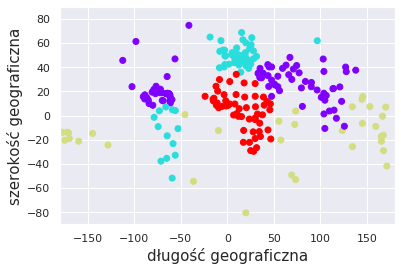

In [14]:
plt.scatter(df['Longitude'], df['Latitude'], 
            c=dane_z_klastrami['Klaster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.xlabel('długość geograficzna',fontsize=15)
plt.ylabel('szerokość geograficzna', fontsize=15);

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.

In [15]:
def grupowanie(liczba_grup):
    kmeans = KMeans(liczba_grup)
    kmeans.fit(x)
    zidentyfikowane_klastry = kmeans.fit_predict(x)
    zidentyfikowane_klastry
    dane_z_klastrami = df.copy()
    dane_z_klastrami['Klaster'] = zidentyfikowane_klastry
    dane_z_klastrami

    plt.scatter(df['Longitude'], df['Latitude'], 
                c=dane_z_klastrami['Klaster'], cmap='rainbow')
    plt.xlim(-180,180)
    plt.ylim(-90, 90)
    plt.xlabel('długość geograficzna',fontsize=15)
    plt.ylabel('szerokość geograficzna', fontsize=15)

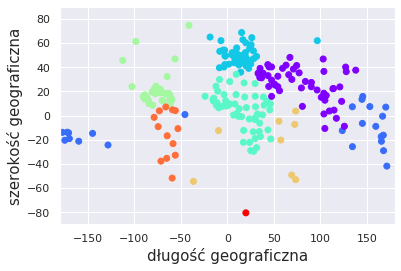

In [19]:
grupowanie(8)